### WARNING
### SETELAH RUN, SILAHKAN **HAPUS OUTPUT DARI NOTEBOOK** (BAGI YANG AKAN GIT)

In [1]:
import csv
import json
from io import BytesIO
from zipfile import ZipFile

import pandas as pd
import requests
import numpy as np

In [2]:
# Authorization
def odk_auth(authfile):
    with open(authfile, "r") as f:
        ak = f.readlines()
    f.close()
    return ak[0].replace("\n", ""), ak[1].replace("\n", "")


authfile = "./auth.k"

central_email, central_password = odk_auth(authfile)
central_url = "https://odk.genolife.org"

In [3]:
# !pip install nbstripout
# !nbstripout --install

In [4]:
def get_email_token():
    email_token_response = requests.post(
        central_url + "/v1/sessions",
        data=json.dumps({"email": central_email, "password": central_password}),
        headers={"Content-Type": "application/json"},
    )
    if email_token_response.status_code == 200:
        return email_token_response.json()["token"]


def list_app_users(email_token, central_project_id):
    app_users_response = requests.get(
        central_url + "/v1/projects/" + str(central_project_id) + "/app-users",
        headers={"Authorization": "Bearer " + email_token},
    )
    app_users = {}
    for app_user in app_users_response.json():
        app_users[app_user["id"]] = app_user["displayName"]
    return app_users


def list_projects(email_token):
    projects_response = requests.get(
        central_url + "/v1/projects/",
        headers={"Authorization": "Bearer " + email_token},
    )
    projects = {}
    for project in projects_response.json():
        projects[project["id"]] = project["name"]
    return projects

In [5]:
def odk_form(authfile):
    with open(authfile, "r") as f:
        ak = f.readlines()
    f.close()
    return (
        ak[2].replace("\n", ""),
#         ak[3].replace("\n", ""),
#         ak[4].replace("\n", ""),
#         ak[5].replace("\n", ""),
    )


form = odk_form(authfile)

In [6]:
email_token = get_email_token()

dataRaw = pd.DataFrame(None)
for i in form:
    request = requests.get(
        url=i, headers={"Authorization": "Bearer " + str(email_token)}
    )
    dataODK = pd.read_csv(BytesIO(request.content), compression="zip")
    dataRaw = dataRaw.append(dataODK)

In [7]:
dataRaw

,SubmissionDate,start,group_firstPage-group_identitas-name,group_firstPage-group_identitas-idRespondent,group_firstPage-group_identitas-gender,group_firstPage-group_identitas-birthDate,group_firstPage-group_identitas-dateSurvey,group_firstPage-group_identitas-timeSurvey,group_firstPage-group_activity-question1,group_firstPage-group_activity-question2,...,group_secondPage-group_result-result,group_secondPage-group_disclaimer-disclaimer,__version__,meta-instanceID,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2020-12-19T11:47:17.737Z,2020-12-19T18:45:29.010+07:00,Ahmad Baliyo Eko,003,male,1982-11-14,2020-12-19,18:45:28.853+07:00,no,NaN,...,NaN,NaN,NaN,uuid:6e52ea77-aa2b-4e4d-92b2-f3bdc105ac35,uuid:6e52ea77-aa2b-4e4d-92b2-f3bdc105ac35,21,Afkaaruna,0,0,NaN
1,2020-12-19T02:07:57.763Z,2020-12-19T09:06:23.201+07:00,Samsul Ma'arif Mujiharto,001,male,1979-04-10,2020-12-19,09:06:23.173+07:00,no,NaN,...,NaN,NaN,NaN,uuid:feff467b-ee39-44cc-aae0-bb8738f422e8,uuid:feff467b-ee39-44cc-aae0-bb8738f422e8,21,Afkaaruna,0,0,NaN
2,2020-12-12T14:33:52.400Z,2020-12-12T21:30:11.847+07:00,Seilannisfia Galuh Aminarti,020,female,2007-07-31,2020-12-12,21:30:11.810+07:00,no,NaN,...,NaN,NaN,NaN,uuid:fd8de394-cdbb-4efa-9a0b-65e9807365af,uuid:fd8de394-cdbb-4efa-9a0b-65e9807365af,21,Afkaaruna,0,0,NaN
3,2020-12-12T14:28:25.671Z,2020-12-12T21:25:55.626+07:00,Sofia a yuna el ezzat,22,female,2007-07-22,2020-12-12,21:25:55.587+07:00,no,NaN,...,NaN,NaN,NaN,uuid:6141438f-bbac-4fca-b99a-a98976ff6a6a,uuid:6141438f-bbac-4fca-b99a-a98976ff6a6a,21,Afkaaruna,0,0,NaN
4,2020-12-12T14:25:37.573Z,2020-12-12T21:20:41.362+07:00,Rafifa Syahada Maheswari,16,female,2007-12-16,2020-12-12,21:20:41.340+07:00,no,NaN,...,NaN,NaN,NaN,uuid:28cb0fe7-8fde-4be3-9f18-c3d6a0655852,uuid:28cb0fe7-8fde-4be3-9f18-c3d6a0655852,21,Afkaaruna,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2020-09-03T13:11:17.248Z,2020-09-03T20:08:26.743+07:00,Seilannisfia,025,female,2007-07-31,2020-09-03,20:08:26.739+07:00,no,NaN,...,NaN,NaN,NaN,uuid:99c90290-62db-4a01-acb2-2f079f7acaa6,uuid:99c90290-62db-4a01-acb2-2f079f7acaa6,21,Afkaaruna,0,0,NaN
211,2020-09-03T13:08:17.517Z,2020-09-03T20:05:52.331+07:00,Ataaya raudha mustofa,009,female,2008-11-02,2020-09-03,20:05:52.328+07:00,no,NaN,...,NaN,NaN,NaN,uuid:cfb04199-5d6c-4d64-a7cb-57bca5cfdede,uuid:cfb04199-5d6c-4d64-a7cb-57bca5cfdede,21,Afkaaruna,0,0,NaN
212,2020-09-03T12:24:48.997Z,2020-09-03T19:21:51.182+07:00,Sofia A'yuna El-ezzat,026,female,2007-07-22,2020-09-03,19:21:51.179+07:00,no,NaN,...,NaN,NaN,NaN,uuid:6194a785-e4c1-45ab-9443-985fffec440b,uuid:6194a785-e4c1-45ab-9443-985fffec440b,21,Afkaaruna,0,0,NaN
213,2020-09-03T12:21:36.481Z,2020-09-03T19:19:32.772+07:00,Nikeisha,020,female,2008-04-23,2020-09-03,19:19:32.765+07:00,no,NaN,...,NaN,NaN,NaN,uuid:562a4758-e899-4968-b4bd-0f17cefcde3c,uuid:562a4758-e899-4968-b4bd-0f17cefcde3c,21,Afkaaruna,0,0,NaN


In [16]:
dataRaw.shape
dataRaw.columns.values

array(['SubmissionDate', 'start', 'group_firstPage-group_identitas-name',
       'group_firstPage-group_identitas-idRespondent',
       'group_firstPage-group_identitas-gender',
       'group_firstPage-group_identitas-birthDate',
       'group_firstPage-group_identitas-dateSurvey',
       'group_firstPage-group_identitas-timeSurvey',
       'group_firstPage-group_activity-question1',
       'group_firstPage-group_activity-question2',
       'group_firstPage-group_activity-question3',
       'group_firstPage-group_activity-question4',
       'group_firstPage-group_tracer-name1',
       'group_firstPage-group_tracer-idRespondent1',
       'group_firstPage-group_tracer-name2',
       'group_firstPage-group_tracer-idRespondent2',
       'group_firstPage-group_tracer-name3',
       'group_firstPage-group_tracer-idRespondent3',
       'group_firstPage-group_symptom-symptom1',
       'group_firstPage-group_symptom-suhu',
       'group_firstPage-group_symptom-symptom2',
       'group_firstPage

In [17]:
dataRaw.describe()

,group_firstPage-group_activity-question2,group_firstPage-group_activity-question4,group_firstPage-group_tracer-idRespondent2,group_firstPage-group_tracer-idRespondent3,group_firstPage-group_symptom-suhu,group_secondPage-group_result-calcS1,group_secondPage-group_result-calcS2,group_secondPage-group_result-calcS3,group_secondPage-group_result-calcS4,group_secondPage-group_result-calcS5,...,group_secondPage-group_result-calcsymptom,group_secondPage-group_result-calc6,group_secondPage-group_result-calc8,group_secondPage-group_result-result,group_secondPage-group_disclaimer-disclaimer,__version__,SubmitterID,AttachmentsPresent,AttachmentsExpected,Status
count,0.0,0.0,173.000000,173.000000,214.000000,215.0,215.000000,215.000000,215.000000,215.0,...,215.000000,215.000000,169.000000,0.0,0.0,0.0,215.0,215.0,215.0,0.0
mean,NaN,NaN,16.121387,14.982659,36.247664,0.0,0.004651,0.004651,0.004651,0.0,...,0.055814,0.055814,1.059172,NaN,NaN,NaN,21.0,0.0,0.0,NaN
std,NaN,NaN,8.341006,8.120799,0.660324,0.0,0.068199,0.068199,0.068199,0.0,...,0.230098,0.230098,0.236647,NaN,NaN,NaN,0.0,0.0,0.0,NaN
min,NaN,NaN,1.000000,1.000000,31.500000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,21.0,0.0,0.0,NaN
25%,NaN,NaN,9.000000,9.000000,36.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,21.0,0.0,0.0,NaN
50%,NaN,NaN,14.000000,14.000000,36.500000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,21.0,0.0,0.0,NaN
75%,NaN,NaN,26.000000,22.000000,36.500000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,21.0,0.0,0.0,NaN
max,NaN,NaN,28.000000,28.000000,42.000000,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,2.000000,NaN,NaN,NaN,21.0,0.0,0.0,NaN


In [9]:
dataRaw.loc[0:215,"group_firstPage-group_identitas-idRespondent":"group_firstPage-group_tracer-idRespondent3"]

,group_firstPage-group_identitas-idRespondent,group_firstPage-group_identitas-gender,group_firstPage-group_identitas-birthDate,group_firstPage-group_identitas-dateSurvey,group_firstPage-group_identitas-timeSurvey,group_firstPage-group_activity-question1,group_firstPage-group_activity-question2,group_firstPage-group_activity-question3,group_firstPage-group_activity-question4,group_firstPage-group_tracer-name1,group_firstPage-group_tracer-idRespondent1,group_firstPage-group_tracer-name2,group_firstPage-group_tracer-idRespondent2,group_firstPage-group_tracer-name3,group_firstPage-group_tracer-idRespondent3
0,003,male,1982-11-14,2020-12-19,18:45:28.853+07:00,no,NaN,no,NaN,Samsul Maarif Mujiharto,001,Mohammad Yasfi Kandias,4.0,Muhammad Alvin Malana,5.0
1,001,male,1979-04-10,2020-12-19,09:06:23.173+07:00,no,NaN,no,NaN,002,NaN,003,NaN,004,NaN
2,020,female,2007-07-31,2020-12-12,21:30:11.810+07:00,no,NaN,no,NaN,Aulia Syifa Ayu Anandita,04,Jahian Lubbina Laffizza,9.0,Rafifa Syahada Maheswari,16.0
3,22,female,2007-07-22,2020-12-12,21:25:55.587+07:00,no,NaN,no,NaN,Azeyta,06,Ataaya,4.0,Isqina,8.0
4,16,female,2007-12-16,2020-12-12,21:20:41.340+07:00,no,NaN,no,NaN,Nikeisha Neelnal Muna Salsabila Rahmad,15,Azeyta Mayyaza Asmaa' Ali Rahman,6.0,Ataaya Raudha Musthafa,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,025,female,2007-07-31,2020-09-03,20:08:26.739+07:00,no,NaN,no,NaN,Syifa,010,Syahda,21.0,Zakiyyah,27.0
211,009,female,2008-11-02,2020-09-03,20:05:52.328+07:00,no,NaN,no,NaN,Keisha,020,Azeyta,11.0,Sofi,26.0
212,026,female,2007-07-22,2020-09-03,19:21:51.179+07:00,no,NaN,no,NaN,Najwa,027,Zakiyyah,27.0,Keisha,20.0
213,020,female,2008-04-23,2020-09-03,19:19:32.765+07:00,no,NaN,no,NaN,Attaya,009,Jihan,14.0,Azeyta,11.0


In [18]:
dataRaw["group_firstPage-group_identitas-gender"].value_counts()

female    164
male       51
Name: group_firstPage-group_identitas-gender, dtype: int64

TypeError: no numeric data to plot

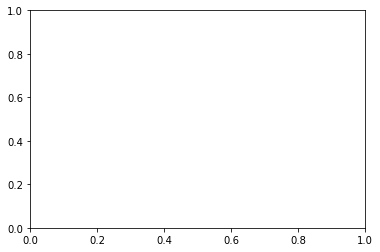

In [14]:
import matplotlib.pyplot as plt